In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
data = pd.read_csv("adult.csv")
data.head(50)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

In [ ]:
x = data.drop('income', axis=1)
y = data['income']

In [ ]:
# Random Forest Classifier with Cross-Validation

In [ ]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
cv_scores = cross_val_score(rf_pipeline, x, y, cv=5)

In [ ]:
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.85587061 0.85505169 0.85472973 0.85933661 0.86015561]
Mean CV Score: 0.857028850894651
Standard Deviation of CV Scores: 0.002264464566761711


In [ ]:
# Overfitting and Underfitting in Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
for n_estimators in [50, 100, 150]:
    for learning_rate in [0.01, 0.1, 0.5]:
        gbc_pipeline = make_pipeline(StandardScaler(),
                                     GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate))
        gbc_pipeline.fit(x_train, y_train)
        train_score = gbc_pipeline.score(x_train, y_train)
        val_score = gbc_pipeline.score(x_val, y_val)
        print("n_estimators: " + str(n_estimators) + ", learning_rate: " + str(learning_rate) + ", Train Score: " + str(train_score) + ", Validation Score: " + str(val_score))

n_estimators: 50, learning_rate: 0.01, Train Score: 0.8028561922555217, Validation Score: 0.8101136247312929
n_estimators: 50, learning_rate: 0.1, Train Score: 0.8597752924014025, Validation Score: 0.8645716040536391
n_estimators: 50, learning_rate: 0.5, Train Score: 0.8752079441046247, Validation Score: 0.878288463507012
n_estimators: 100, learning_rate: 0.01, Train Score: 0.8405804519745093, Validation Score: 0.8468625243115979
n_estimators: 100, learning_rate: 0.1, Train Score: 0.8671972973664679, Validation Score: 0.8735796908588391
n_estimators: 100, learning_rate: 0.5, Train Score: 0.8830906252399355, Validation Score: 0.8762411710512846
n_estimators: 150, learning_rate: 0.01, Train Score: 0.8462621247408697, Validation Score: 0.8508547446002661
n_estimators: 150, learning_rate: 0.1, Train Score: 0.8725462595654289, Validation Score: 0.8774695465247211
n_estimators: 150, learning_rate: 0.5, Train Score: 0.8882348424743429, Validation Score: 0.8764459002968574


In [ ]:
# Precision, Recall, and F1-Score for Random Forests

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
rf_pipeline.fit(x_train, y_train)
y_pred = rf_pipeline.predict(x_val)

In [ ]:
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

In [ ]:
print("Precision:",precision)
print("Recall:",recall)
print("F1-Score:",f1)

Precision: 0.7381193124368048
Recall: 0.6375545851528385
F1-Score: 0.6841611996251171


In [ ]:
# ROC Curve and AUC for Gradient Boosting

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
gbc_pipeline.fit(x_train, y_train)
y_proba = gbc_pipeline.predict_proba(x_val)[:, 1]

In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

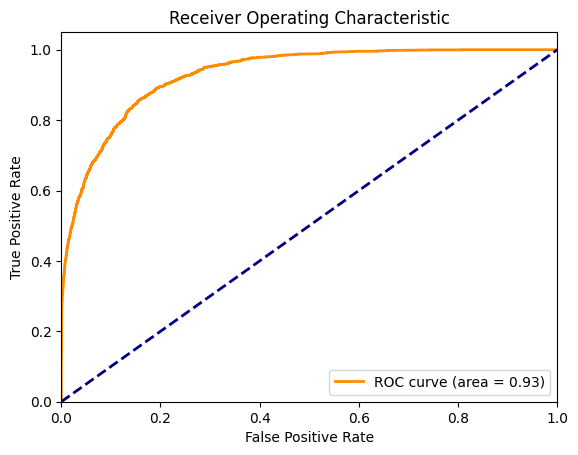

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Comparison with Different Metrics

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'SVM': make_pipeline(StandardScaler(), SVC(probability=True)),
    'Random Forest': make_pipeline(StandardScaler(), RandomForestClassifier()),
    'Gradient Boosting': make_pipeline(StandardScaler(), GradientBoostingClassifier())
}


In [ ]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    y_proba = model.predict_proba(x_val)[:, 1]

    accuracy = model.score(x_val, y_val)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba)

    print("{} - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}, ROC-AUC: {:.2f}".format(
        name, accuracy, precision, recall, f1, roc_auc))

SVM - Accuracy: 0.86, Precision: 0.76, Recall: 0.57, F1-Score: 0.65, ROC-AUC: 0.89
Random Forest - Accuracy: 0.86, Precision: 0.74, Recall: 0.64, F1-Score: 0.69, ROC-AUC: 0.91
Gradient Boosting - Accuracy: 0.87, Precision: 0.80, Recall: 0.62, F1-Score: 0.70, ROC-AUC: 0.92


In [ ]:
from google.colab import drive
drive.mount('/content/drive')